# **IS 590PR Final Project. Fall 2019** 
### By Shruti Shakhla
### Problem Statement :
   Using Monte Carlo to analyze the change in Business revenue of an organization by increasing the click through rate of the organizations website.
### Hypothesis :
Increasing the click through rate of one webpage(homepage in this case) increases the traffic to the website hence increases the profits.



In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, scipy, random
plt.style.use('default')

### Data :
Data is matrix that represents the business of a website. 
The site has a landing home page, a Frequently Asked Questions (FAQ) page, a product page (where it lists the for sale products), and then pages for the two products the business offers. Each product can only be purchased from the product page.
Each row lists the connection probability between pages.

 The below 3 cells contain three different functions that together generate a CTR matrix that has random values for probablities which adhere to the following constarints:
    1. The sum of all values in a row of the matrix should either be zero or one 
    (since these are probablities, thus the total sum can either be zero or one)
    2. The probablities of a user traversing from the item page to the purchase page is always 0.15 because I have considered that for increasing the CTR  
    website and not the people buying the product
    3. All the random variables must be < 1
    

In [2]:
def generate_random_row(rowNumber):
    arr = np.random.random([8]).tolist()
    arr[rowNumber], arr[-1], arr[-2] = 0.0, 0.0, 0.0
    
    s = sum(arr)
    arr = [(i/s) for i in arr]
    if rowNumber in [4, 5]:
        sub = 0.0
        while sub != 0.15:
            for i in range(len(arr)):
                if sub == 0.15: break
                if arr[i] < 0.01: continue
                else:
                    arr[i] -= 0.01
                    sub += 0.01
        arr[rowNumber + 2] = 0.15
    return arr

In [3]:
def generate_CTR():
    CTR, temp = [], [0.0] * 8
    for row in range(6):
        curr_row = generate_random_row(row)
        CTR.append(curr_row)
    CTR.append(temp)
    CTR.append(temp)
    return CTR

In [4]:
def generate_CTR_dataFrame():
    CTR = generate_CTR()
    cols = ["Internet", "Home", "FAQ", "Products", "Item 1", "Item 2", "Purchase 1", "Purchase 2"]
    df = pd.DataFrame(CTR, columns=cols, index=cols)
    return df

The function below simulates the movements of a single user and returns the final page of the user (that is did the user purchase a product or leave the website)

In [5]:
def simulate_single_user(CTR):  
    pages, current_page, revenue = np.arange(8), 0, {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:100, 7:75}
    
    while True: 
        current_page = np.random.choice(pages, p=CTR.iloc[current_page].values.tolist())
        if (current_page == 0) or (current_page == 6) or (current_page == 7): break
    return revenue[current_page]

The funciton below takes a given fixed CTR and the number of iterations and computes the statistics for those iterations

In [6]:
def simulate_iterations(iterations, CTR):
    cash, bounce, item1, item2 = 0.,  0., 0., 0.

    for _ in range(iterations):
        current = float(simulate_single_user(CTR))

        if current == 100: item1 += 1.
        elif current == 75: item2 += 1.
        else: bounce += 1
        cash += current

    return cash, bounce, item1, item2

The function below uses the function above as skeleton and feeds in different iterations and CTR values.

In [7]:
def simulate_for_groups():
    revenue, item1Total, item2Total, bounceTotal, groups, iterations = [], [], [], [], 1000, 1000
    CTR = generate_CTR_dataFrame()
    for i in range(groups):
        one, two, three, four = simulate_iterations(iterations, CTR)
        revenue, bounceTotal, item1Total, item2Total = revenue + [one],  bounceTotal + [two], item1Total + [three], item2Total + [four]
    return revenue, bounceTotal, item1Total, item2Total

In [8]:
def get_after_market_values(a):
    a2 = [i for i in a]
    for i in range(len(a2)):
        temp = np.random.randint(0, 1000)
        a2[i] += temp
    return a2

The function below takes an input CTR and converts the probabilities according to the improved marketing strategy mentioned in the hypothesis.

In [9]:
def get_hypothesis_CTR(CTR):
    CTR.iloc[0, :] = 0.0
    CTR.iloc[0, 1] = 1.0
    return CTR

The function below takes in the metrics and prints them for a user to view anytime

In [10]:
def printStats(revenue, bounceTotal, item1Total, item2Total, iterations):
    print("Average Revenue/user: ", np.mean(revenue)/iterations)
    print("Average Bounce Rate: ", np.mean(bounceTotal)/iterations)
    print("Average Item 1 Purchases: ", np.mean(item1Total)/iterations)
    print("Average Item 2 Purchases: ", np.mean(item2Total)/iterations)
    print ("")

# Analysis of the hypothesis

In [11]:
a, b, c, d = simulate_for_groups()

In [12]:
printStats(a, b, c, d, 1000)

Average Revenue/user:  40.860275
Average Bounce Rate:  0.5273
Average Item 1 Purchases:  0.216311
Average Item 2 Purchases:  0.25638900000000003



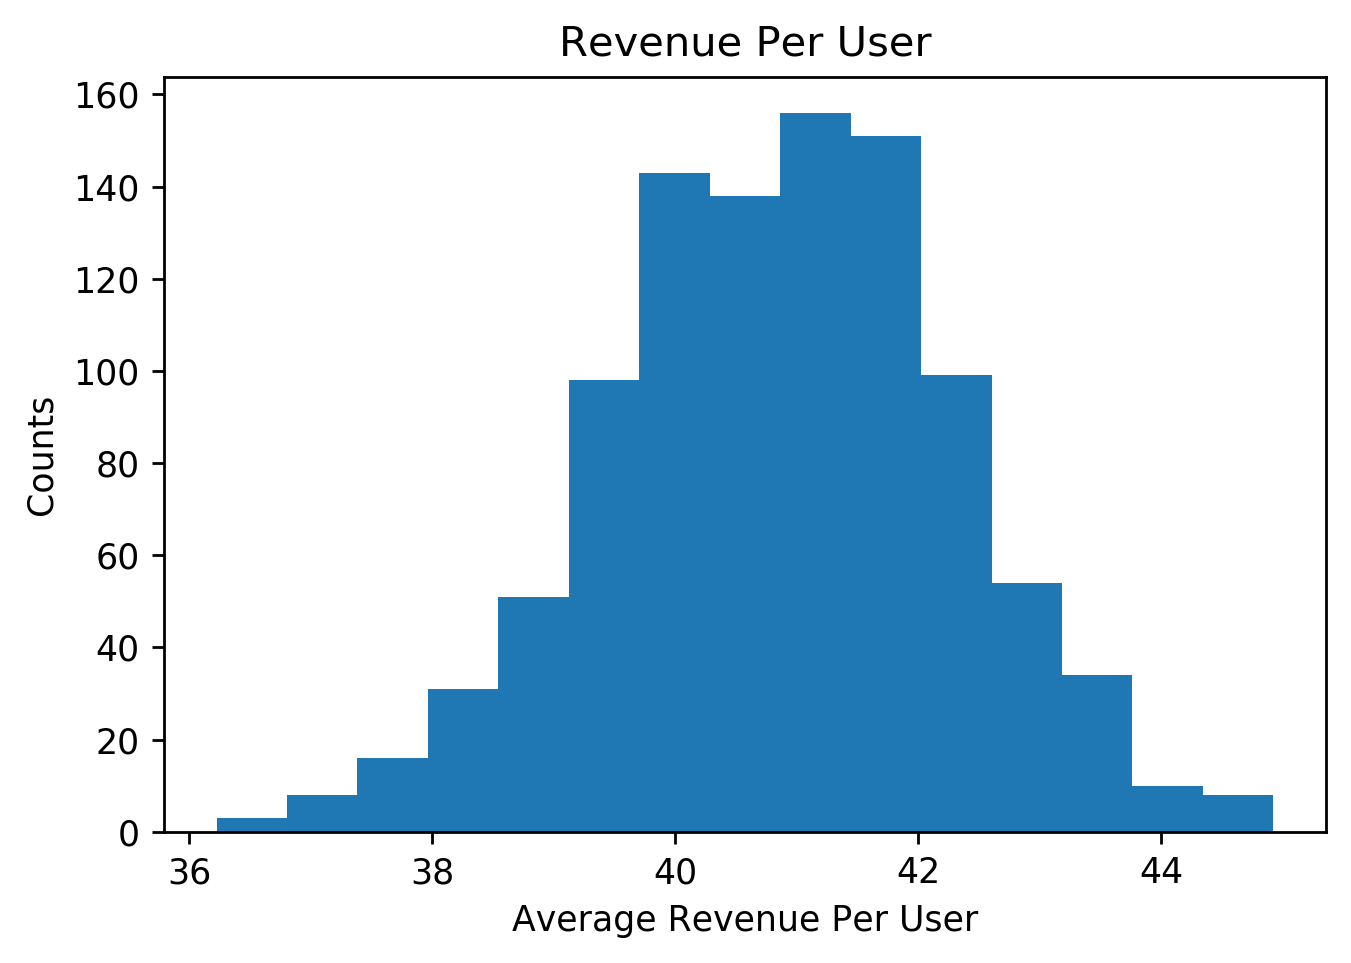

In [13]:
plt.figure(dpi=250)
plt.hist(np.array(a)/1000, bins=15);
plt.xlabel("Average Revenue Per User");
plt.ylabel("Counts")
plt.title("Revenue Per User");

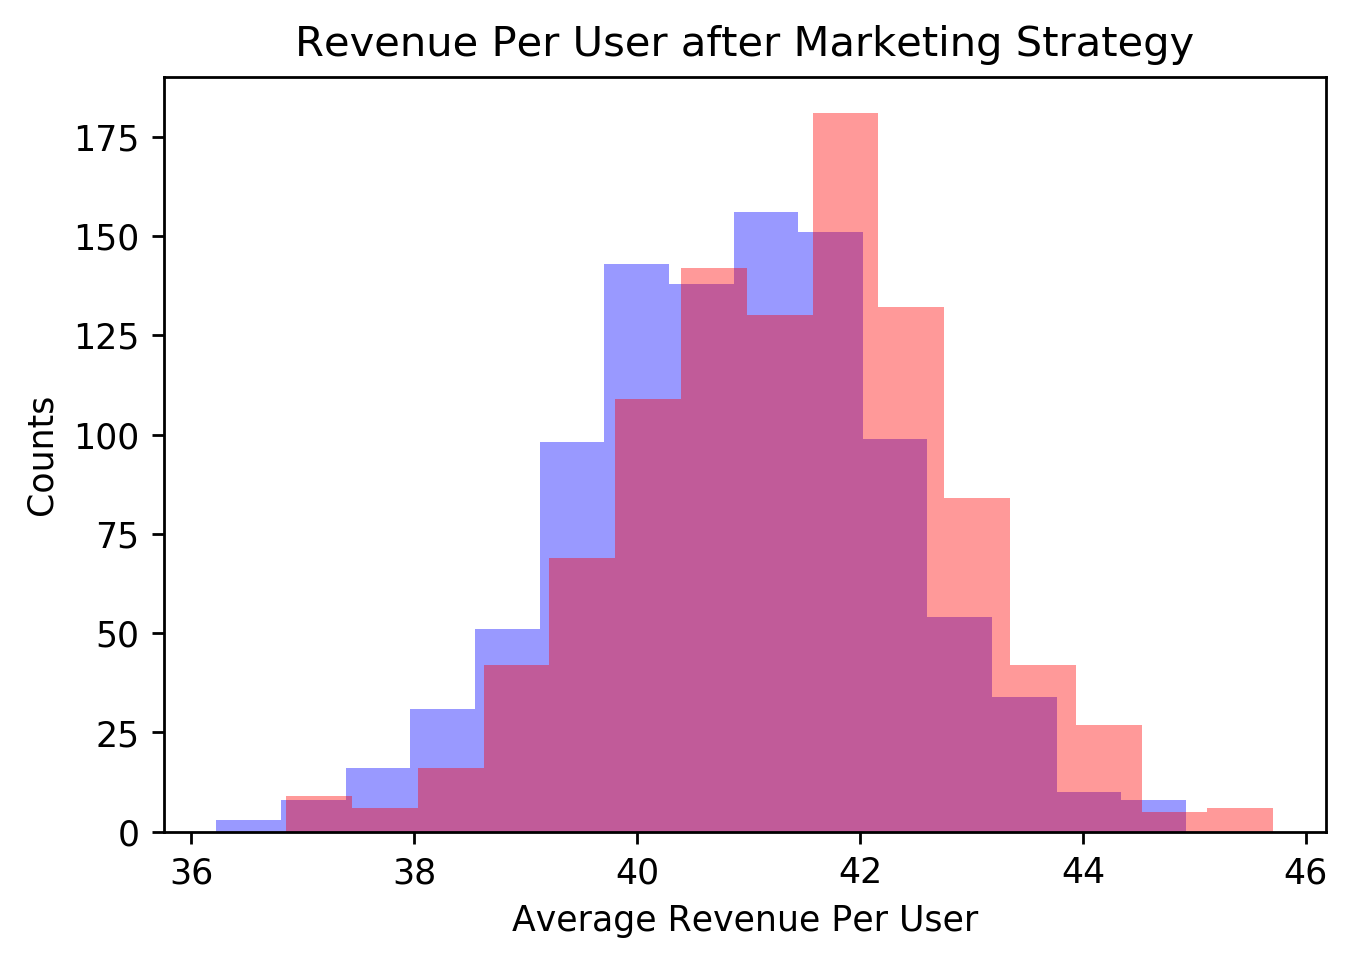

In [14]:
a2 = get_after_market_values(a)

plt.figure(dpi=250)
plt.hist(np.array(a)/1000, bins=15, color='b', alpha = 0.4);
plt.hist(np.array(a2)/1000, bins=15, color='r', alpha = 0.4);
plt.xlabel("Average Revenue Per User");
plt.ylabel("Counts")
plt.title("Revenue Per User after Marketing Strategy");

In [15]:
revenue, item1Total, item2Total, bounceTotal, groups, iterations = [], [], [], [], 10, 10**4
revenue2, item1Total2, item2Total2, bounceTotal2 = [],  [], [],  []

for i in range(groups):
    CTR = generate_CTR_dataFrame()
    CTR2 = get_hypothesis_CTR(CTR)
    one, two, three, four = simulate_iterations(iterations, CTR)
    revenue, bounceTotal, item1Total, item2Total = revenue + [one],  bounceTotal + [two], item1Total + [three], item2Total + [four]
    
    a, b, c, d = simulate_iterations(iterations, CTR2)
    revenue2, bounceTotal2, item1Total2, item2Total2 = revenue2 + [a],  bounceTotal2 + [b], item1Total2 + [c], item2Total2 + [d]
    

In [16]:
printStats(revenue, bounceTotal, item1Total, item2Total, iterations)

Average Revenue/user:  22.377
Average Bounce Rate:  0.74405
Average Item 1 Purchases:  0.12722999999999998
Average Item 2 Purchases:  0.12872



In [17]:
printStats(revenue2, bounceTotal2, item1Total2, item2Total2, iterations)

Average Revenue/user:  22.41025
Average Bounce Rate:  0.74443
Average Item 1 Purchases:  0.1297
Average Item 2 Purchases:  0.12587



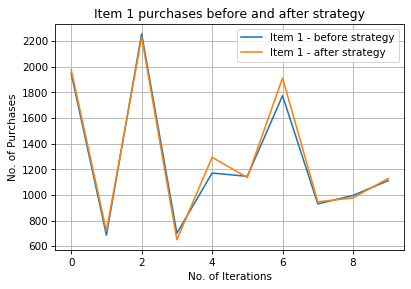

In [18]:
plt.figure(dpi=75)
plt.plot(item1Total)
plt.plot(item1Total2)
plt.title('Item 1 purchases before and after strategy')
plt.ylabel('No. of Purchases')
plt.xlabel('No. of Iterations')
plt.legend(['Item 1 - before strategy', 'Item 1 - after strategy'])
plt.grid()
plt.show()

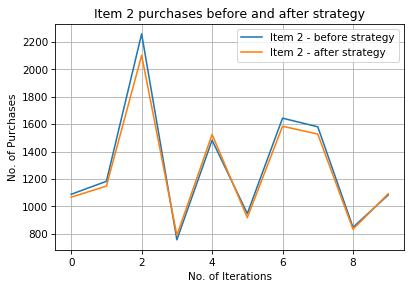

In [19]:
plt.figure(dpi=75)
plt.plot(item2Total)
plt.plot(item2Total2)
plt.title('Item 2 purchases before and after strategy')
plt.ylabel('No. of Purchases')
plt.xlabel('No. of Iterations')
plt.legend(['Item 2 - before strategy', 'Item 2 - after strategy'])
plt.grid()
plt.show()